# 11_20_금 A2_박성건
# 빅데이터 SVM_분류
유방암 데이터

In [75]:
#패키지 불러오기 
import pandas as pd 
#데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
#데이터 scaling
from sklearn.preprocessing import StandardScaler
#데이터 분할;train,test
from sklearn.model_selection import train_test_split
#분류SVM
from sklearn.svm import SVC
#최적 모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV
#모델 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_curve, auc ,recall_score, precision_score

In [48]:
df_raw=pd.read_csv("/home/piai/bigdata/data/BigData/유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
#결측지 확인
df_raw.isnull().sum(axis=0)
#결측치가 없는것을 확인할 수 있다.

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [50]:
df_raw_y = df_raw["diagnosis"] #타겟변수
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False) #설명변수

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)

# 트레인셋에서 다시 트레인셋을 4/7과 3/7로 나눔 그러면 테스트:밸리데이션:테스트=0.4:0.3:0.3 이됨
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
                                                               ,test_size = 3/7, random_state = 1234)


In [51]:
#SCV모델 생성
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
#test 데이터 셋 정확도
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.912
Accuracy on test set:0.895


In [52]:
#현재 생성된 그래디언트 부스팅 모델의 옵션확인
svm_uncustomized

SVC(random_state=1234)

In [53]:
#모델 parameter 조정
#C; 규제에 대한 강도 변경
#train 및 test 정확도 결과 저장용
train_accuracy =[]; validation_accuracy=[]
#lc; 규제 (0.01,0.1,1,10)
para_c=[10**c for c in range(-2,2)]
for v_C in para_c:
    svm=SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))
#데이터 테이블로 저장 
df_accuracy_c=pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["ValidationAccuracy"]=validation_accuracy
#C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,ValidationAccuracy
0,0.01,0.630,0.637
1,0.10,0.899,0.889
2,1.00,0.912,0.901
3,10.00,0.930,0.924


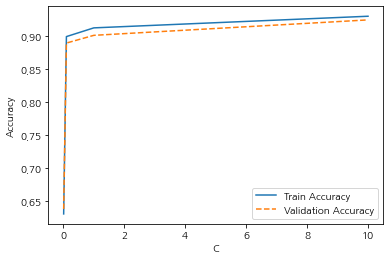

In [54]:
#C별 정확도 그래프로 확인
plt.plot(para_c,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_c,validation_accuracy,linestyle="--",label="Validation Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("C")
plt.legend()
# C가 증가할 수록 모델 복잡도가 증가하여 정확도가 높아지지만 너무 높아지면 과적합의 가능성이 있다.
# 0.1정도로 정했다.


In [55]:
#Gamma: 훈련 샘플이 미치는 영향의 범위를 변경
#train 및 test 정확도 결과 저장용
train_accuracy =[]; validation_accuracy=[]
#lc; 규제 (0.01,0.1,1,10)
para_gamma=[10**gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=0.1 ,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))
#데이터 테이블로 저장 
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["ValidationAccuracy"]=validation_accuracy
#C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,ValidationAccuracy
0,0.01,0.630,0.637
1,0.10,0.899,0.889
2,1.00,0.912,0.901
3,10.00,0.930,0.924


Gamma: 훈련 샘플이 미치는 영향의 범위를 변경 결과

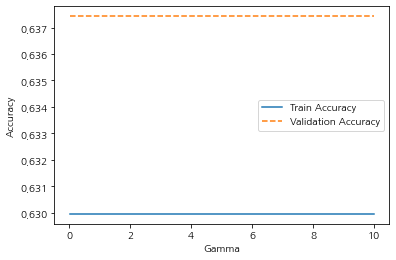

In [58]:
#Gamma별 정확도 그래프로 확인
plt.plot(para_gamma,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_gamma,validation_accuracy,linestyle="--",label="Validation Accuracy")
plt.ylabel("Accuracy"); plt.xlabel("Gamma")
plt.legend()

In [59]:
### scale 변환

In [60]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [61]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled,test_size = 0.3, random_state = 1234)
df_scaled_train_x, df_scaled_validation_x = train_test_split(df_scaled_train_x, test_size = 0.3/0.7, random_state = 1234)

print("train data X size : {}" .format(df_train_x.shape))
print("train data Y size : {}" .format(df_train_y.shape))
print("valid data X size : {}" .format(df_scaled_validation_x.shape))
print("valid data Y size : {}" .format(df_validation_y.shape))
print("test data X size : {}" .format(df_test_x.shape))
print("test data Y size : {}" .format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
valid data X size : (171, 30)
valid data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [62]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
print("Accuracy on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set:0.996
Accuracy on test set:0.936


In [63]:
# p.126~127
# train 및 test 정확도 결과 저장용
train_accuracy = []; validation_accuracy = []
# c: 규제(0.01, 0..1, 1, 10)
para_c = [10 ** c for c in range(-2, 2)]
for v_C in para_c:
    svm = SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(svm.score(df_scaled_validation_x, df_validation_y))
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["ValidationAccuracy"] = validation_accuracy

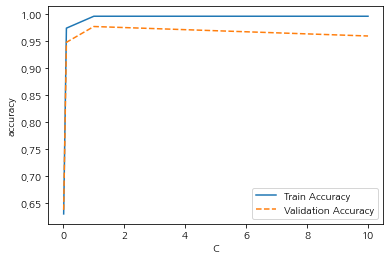

In [64]:
# C별 정확도 테이블
df_accuracy_c.round(3)
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_c, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

In [65]:
# 임의로 지정
C = 1

In [66]:
#새로운 SVC 모델 파라미터 변경
#Gamma 훈련 샘플이 미치는 영향의 범위를 변경 결과
#train 및 test정확도 결과 저장용
train_accuracy=[];validation_accuracy=[]
#gamma: 규제(0.01 , 0.1 , 1, 10)
para_gamma=[10 **gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=1,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_scaled_validation_x,df_validation_y))
#데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['ValidationAccuracy']=validation_accuracy

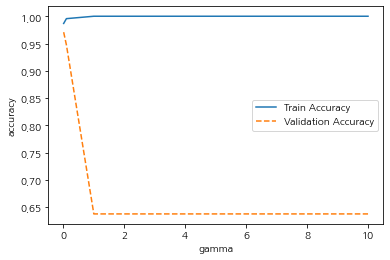

In [67]:
# Gamma 별 정확도 테이블
df_accuracy_gamma.round(3)
# Gamma 별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_gamma, validation_accuracy, linestyle = '--', label = 'Validation Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()
# 임의로 지정
gamma = 0.1

In [68]:
# 최종 모델
svc_final = SVC(gamma = 0.1, C = 1, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_scaled_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}" .format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f} \n" .format(svc_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n {}" .format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.996
Accuracy on test set: 0.918 

Confusion matrix: 
 [[99  6]
 [ 8 58]]


# SVM 모델도 결정트리와 랜덤포레스트처럼 정확도는 90퍼센트 이상이 나오지만 마찬가지로 악성인데 악성이 아니라고 할 확률은 8/66으로 약12퍼센트나 된다.
# 이모델의 적합성을 판단하기 위해 F1 스코어와 정밀도를 검사해볼 필요가 있다.


In [80]:
model_precision_score = precision_score(df_test_y, y_pred)
model_recall = recall_score(df_test_y, y_pred)
model_f1_score = f1_score(df_test_y, y_pred)

In [81]:
print("정밀도:{:.3f}".format(model_precision_score))
print("재현율:{:.3f}".format(model_recall))
print("F1스코어:{:.3f}".format(model_f1_score))

정밀도:0.906
재현율:0.879
F1스코어:0.892


# 정밀도, 재현율, F1스코어 계산결과
# 정밀도: 0.906, 재현율: 0.879, F1스코어: 0.892
# 유방암 악성을 진단하는데에 충분하지 않은 모델이라고 생각한다.
# 하지만 사람이 악성을 악성이 아니라고 할 확률이 87.9퍼센트 이하라고 한다면 이 모델도 사용될 수 있다고 생각한다.